In [131]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [132]:
df = pd.read_csv("cases_malaysia.csv")

In [133]:
df.head()

,cases_new,cases_new.1,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
### Let check out if there are missing value ###

df.isnull().sum()

cases_new                    0
cases_new.1                  0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                3
cases_pvax                   3
cases_fvax                   3
cases_child                  3
cases_adolescent             3
cases_adult                  3
cluster_elderly              3
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_HighRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

#### We noticed that there are several missing value and we should fix that before to carry on with the deployment

### Features Engeenering
#### Missing values

In [135]:
df.dtypes

cases_new                   object
cases_new.1                  int64
cases_import                 int64
cases_recovered              int64
cases_active                 int64
cases_cluster              float64
cases_pvax                 float64
cases_fvax                 float64
cases_child                float64
cases_adolescent           float64
cases_adult                float64
cluster_elderly            float64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_HighRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object

In [136]:
### Fill missing value ###

df['cases_cluster']=df['cases_cluster'].fillna(df['cases_cluster'].mean())
df['cases_pvax']=df['cases_pvax'].fillna(df['cases_pvax'].mean())
df['cases_fvax']=df['cases_fvax'].fillna(df['cases_fvax'].mean())
df['cases_child']=df['cases_child'].fillna(df['cases_child'].mean())
df['cases_adolescent']=df['cases_adolescent'].fillna(df['cases_adolescent'].mean())
df['cases_adult']=df['cases_adult'].fillna(df['cases_adult'].mean())
df['cluster_import']=df['cluster_import'].fillna(df['cluster_import'].mean())
df['cluster_elderly']=df['cluster_elderly'].fillna(df['cluster_elderly'].mean())
df['cluster_religious']=df['cluster_religious'].fillna(df['cluster_religious'].mean())
df['cluster_community']=df['cluster_community'].fillna(df['cluster_community'].mean())
df['cluster_HighRisk']=df['cluster_HighRisk'].fillna(df['cluster_HighRisk'].mean())
df['cluster_education']=df['cluster_education'].fillna(df['cluster_education'].mean())
df['cluster_detentionCentre']=df['cluster_detentionCentre'].fillna(df['cluster_detentionCentre'].mean())
df['cluster_workplace']=df['cluster_workplace'].fillna(df['cluster_workplace'].mean())

<AxesSubplot:>

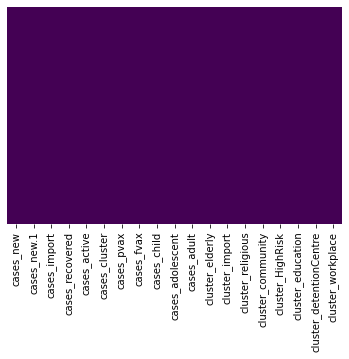

In [137]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [138]:
## After filling up the missing value by implementing fillnan and mean techniques ,
## we can observe that there are no more any missing values

df.isnull().sum()

cases_new                  0
cases_new.1                0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_pvax                 0
cases_fvax                 0
cases_child                0
cases_adolescent           0
cases_adult                0
cluster_elderly            0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_HighRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [139]:
df.shape

(626, 19)

In [140]:
df.describe()

,cases_new.1,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.00000,626.000000,626.000000
mean,3748.087859,7.960064,3524.763578,43460.266773,763.189406,605.863563,577.626003,496.377207,257.956661,2561.804173,298.608347,0.461268,28.880282,249.387324,31.119718,38.65493,76.936620,776.521127
std,5860.226808,8.808178,5771.477987,70239.257797,846.957939,1584.243872,1669.879765,900.328843,448.596610,3916.999022,478.479743,2.524306,42.275363,125.800855,22.467254,48.67006,53.393376,312.972108
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.00000,0.000000,57.000000
25%,37.000000,3.000000,34.250000,851.000000,8.000000,0.000000,0.000000,1.000000,1.000000,23.000000,2.000000,0.000000,7.000000,219.750000,23.250000,17.25000,64.500000,776.521127
50%,1187.000000,5.000000,1023.500000,12743.500000,548.500000,0.000000,0.000000,90.000000,53.000000,888.500000,58.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.936620,776.521127
75%,4281.750000,10.000000,4038.750000,48120.250000,1263.000000,47.500000,22.000000,443.500000,309.500000,3032.250000,375.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.936620,776.521127
max,24599.000000,72.000000,24855.000000,263929.000000,3394.000000,7290.000000,8383.000000,5766.000000,1840.000000,16440.000000,1941.000000,54.000000,359.000000,825.000000,189.000000,501.00000,439.000000,2338.000000


#### Let visualize the progress of the new cases according to the cases and clusters categories

In [141]:
df = df.set_index('cases_new')

In [142]:
df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]

,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
cases_new,,,,,,,,
25/1/2020,0.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.93662,776.521127
26/1/2020,0.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.93662,776.521127
27/1/2020,0.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.93662,776.521127
28/1/2020,0.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.93662,776.521127
29/1/2020,0.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.93662,776.521127
...,...,...,...,...,...,...,...,...
7/10/2021,1164.000000,0.000000,0.000000,240.000000,111.000000,41.00000,5.00000,300.000000
8/10/2021,1132.000000,0.000000,0.000000,157.000000,17.000000,16.00000,8.00000,184.000000
9/10/2021,298.608347,0.000000,0.000000,271.000000,105.000000,42.00000,0.00000,203.000000


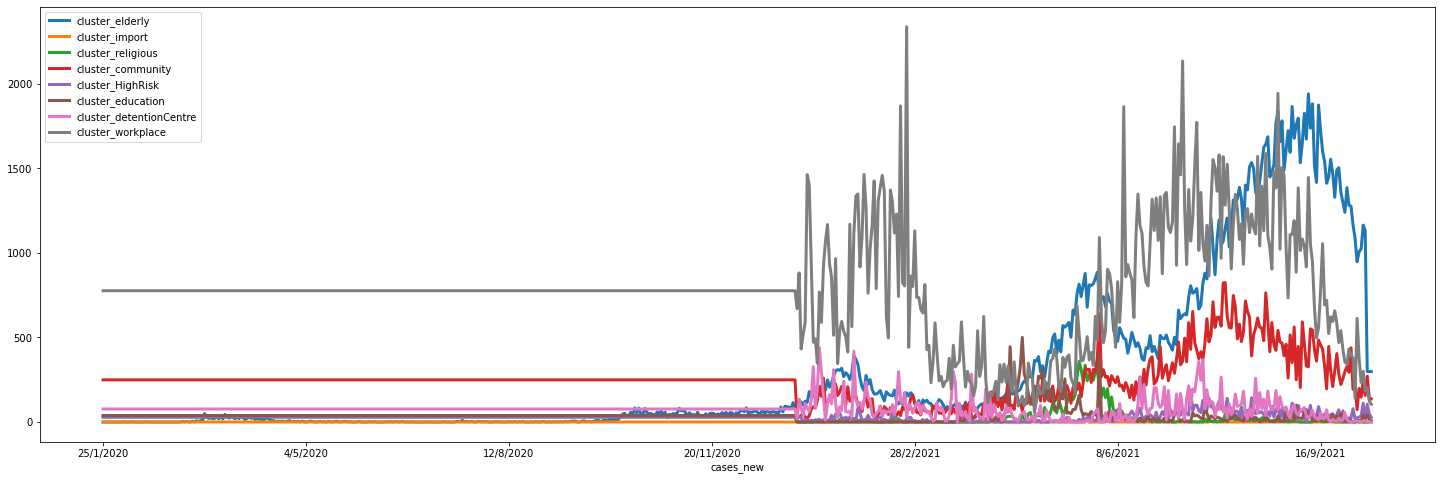

In [144]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [145]:
df = df.set_index('cases_new.1')

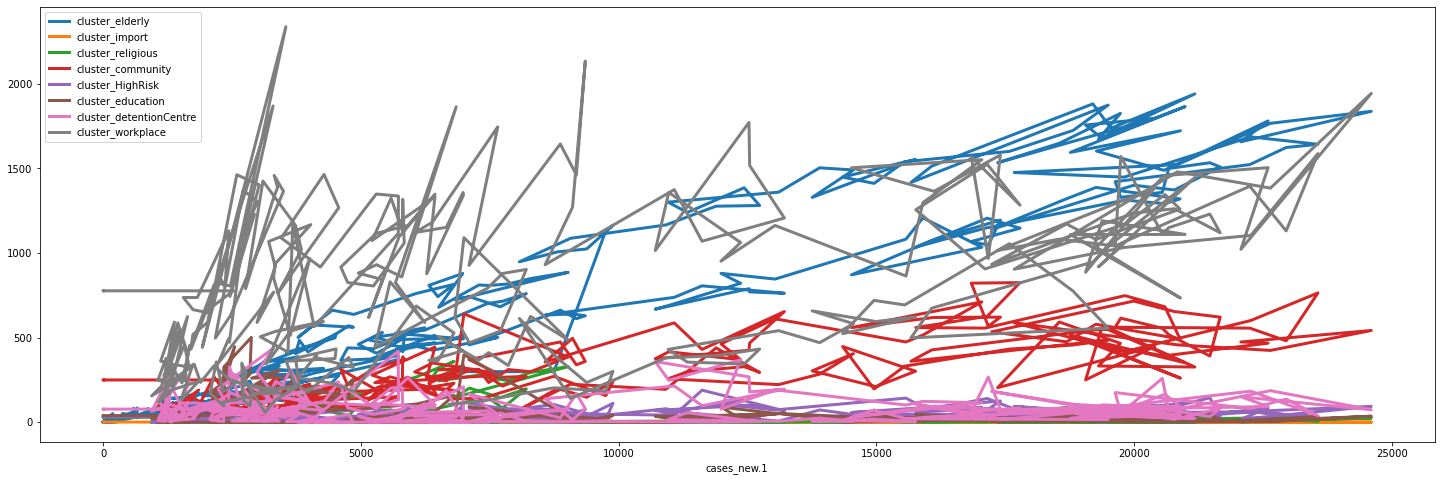

In [146]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [147]:
df = df.set_index('cases_import')

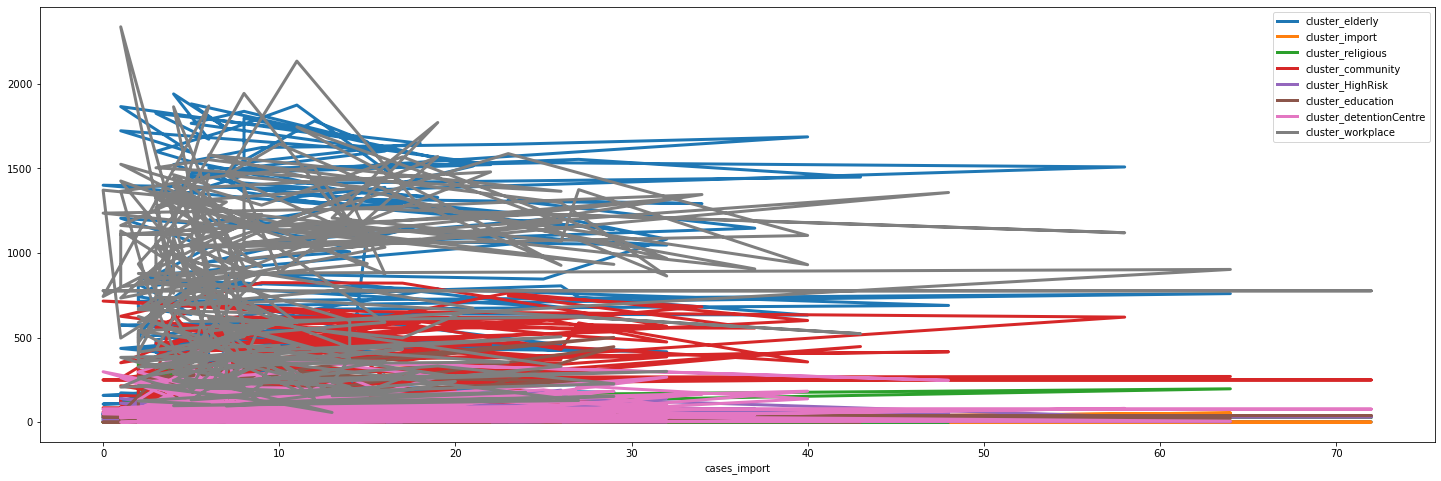

In [148]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [149]:
df = df.set_index('cases_recovered')

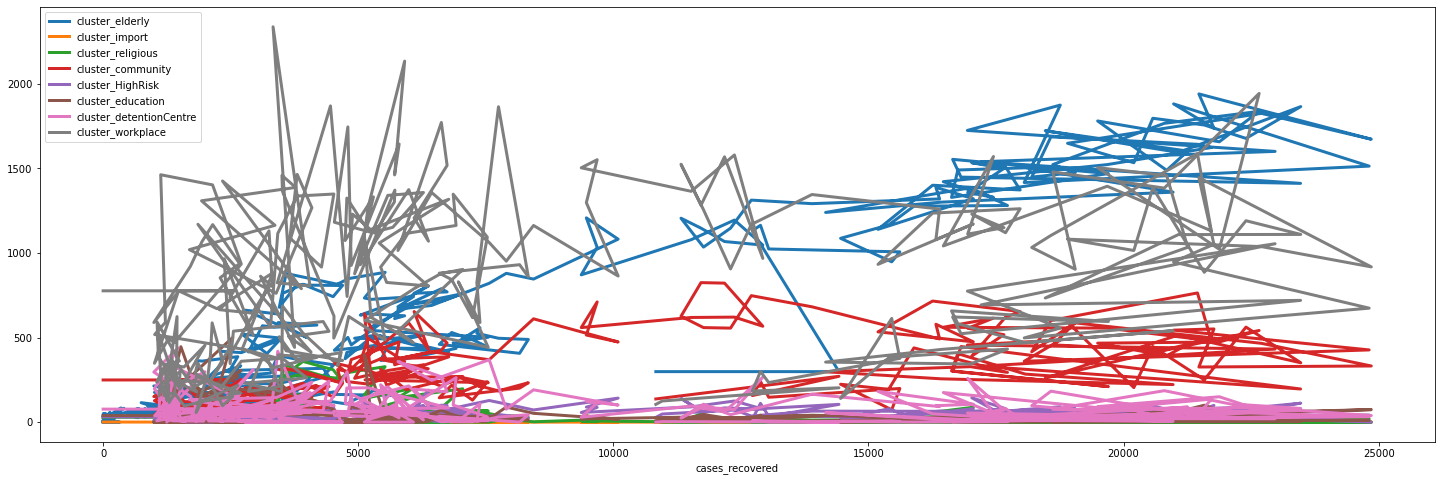

In [150]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [151]:
df = df.set_index('cases_active')

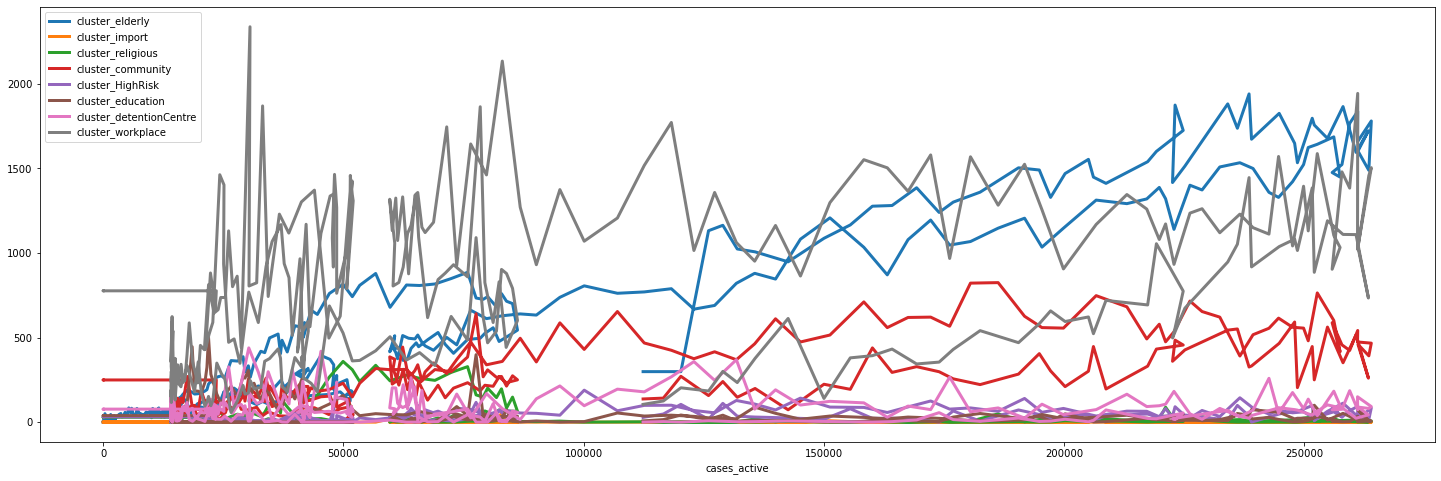

In [152]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [153]:
df = df.set_index('cases_cluster')

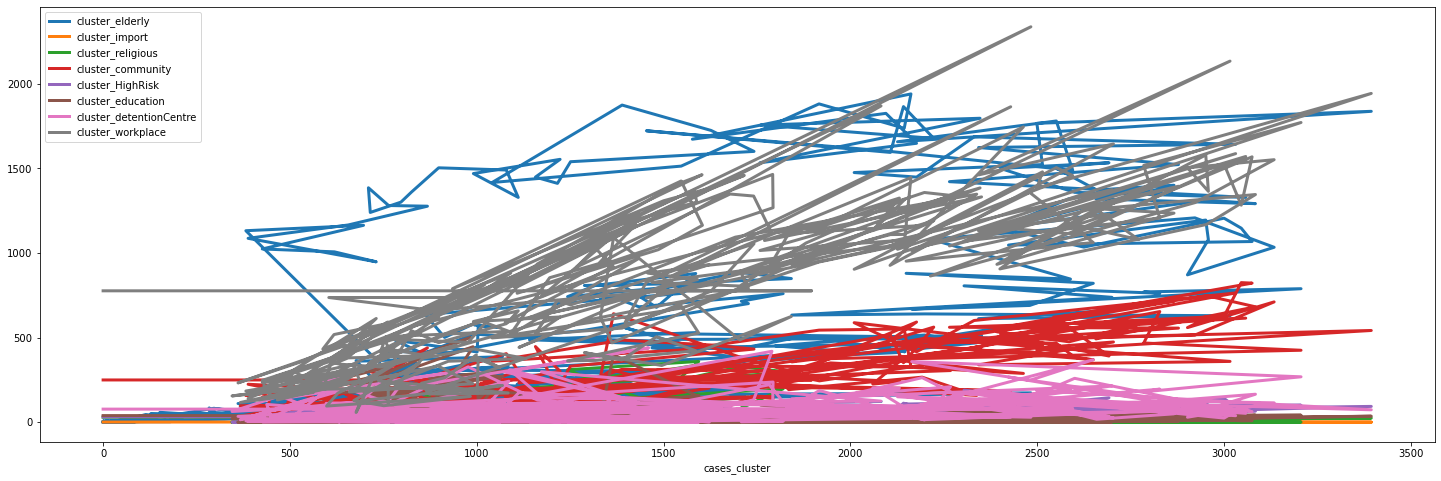

In [154]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [155]:
df = df.set_index('cases_pvax')

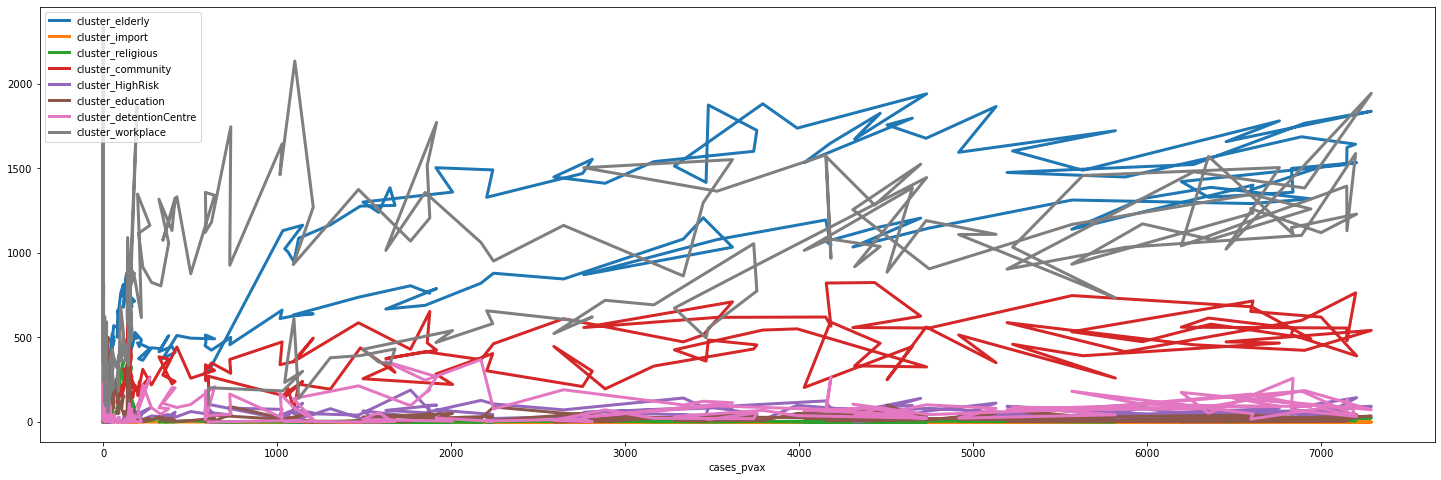

In [156]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [157]:
df = df.set_index('cases_fvax')

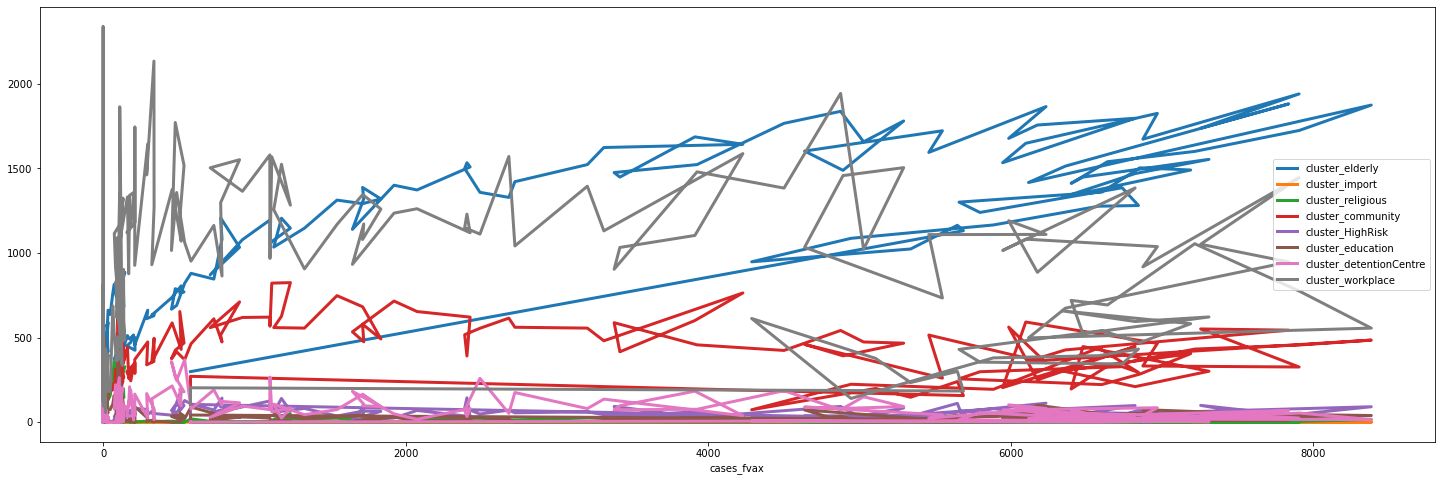

In [158]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [159]:
df = df.set_index('cases_child')

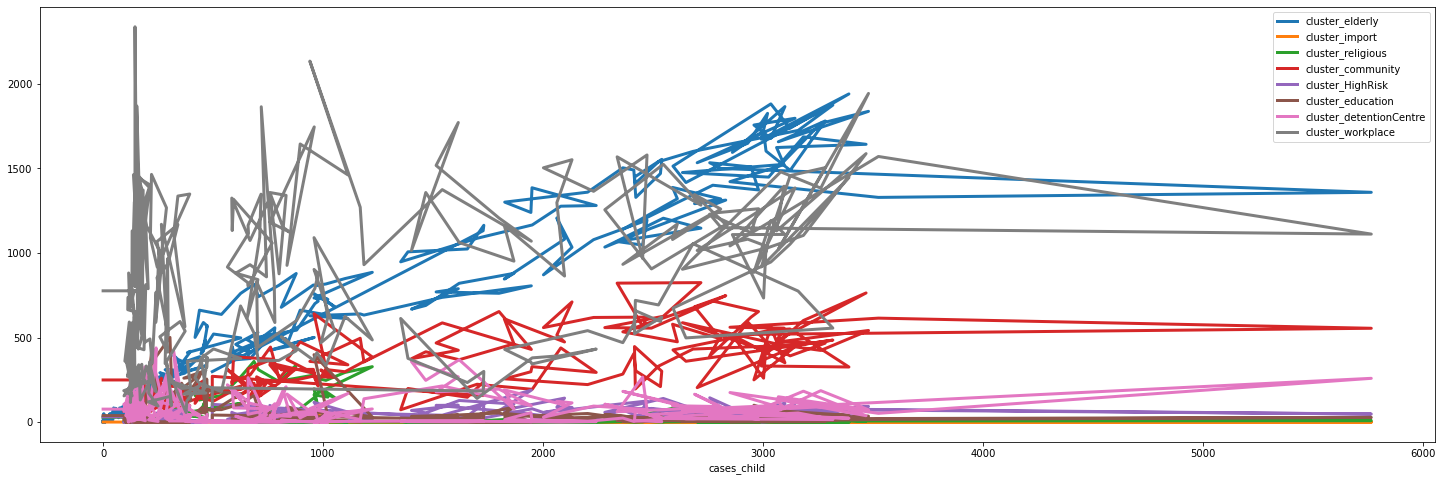

In [160]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [161]:
df = df.set_index('cases_adolescent')

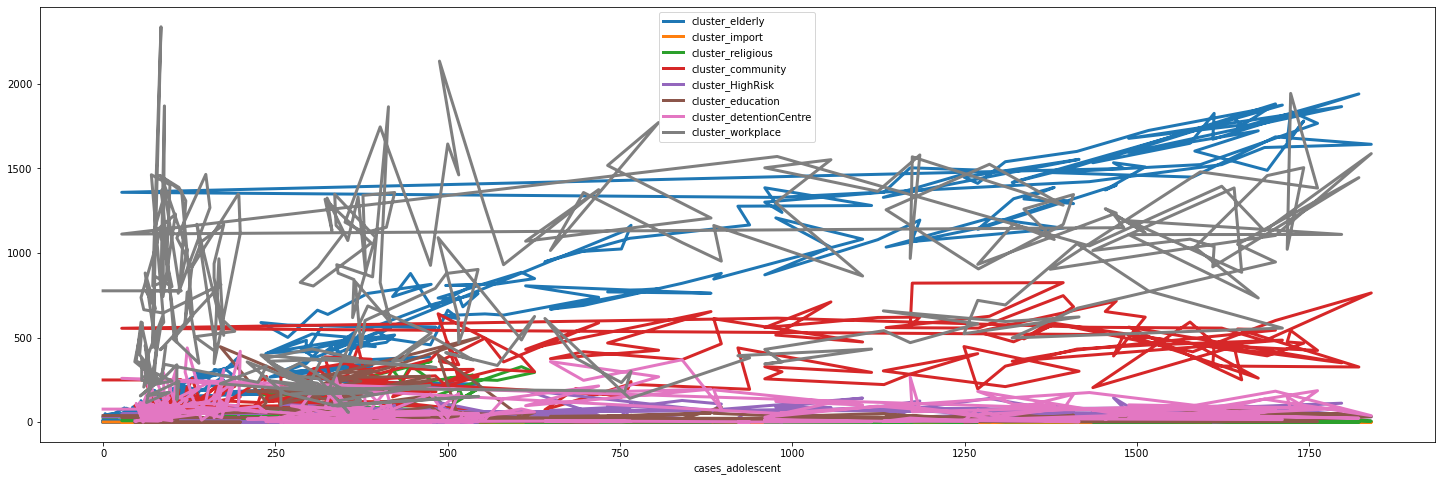

In [162]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

In [163]:
df = df.set_index('cases_adult')

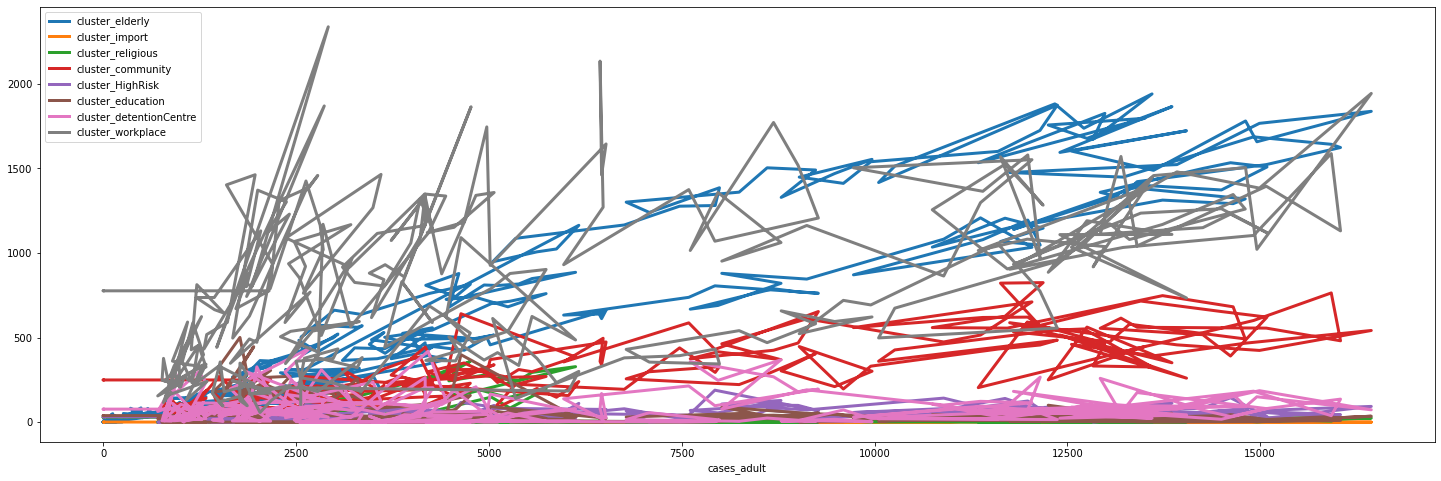

In [164]:
case = df[['cluster_elderly','cluster_import','cluster_religious','cluster_community','cluster_HighRisk','cluster_education','cluster_detentionCentre','cluster_workplace']]
case.plot(figsize=(25,8), linewidth=3, legend=True)

plt.show()

###### After visualizing the data we notice that dominant cluster of covid19 are from Elderly and workplace where
###### it's wisely recommend to protect elder person and encourage people to work at home.

In [172]:
#### Let create the model

##X=df.iloc[:,[3,17]].values

X = df.iloc[:, :-1].values

### Using the elbow method to find the optimal number of clusters

In [173]:
from sklearn.cluster import KMeans

In [174]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

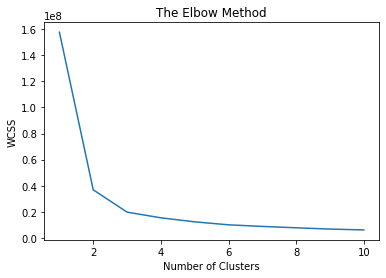

In [175]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Fitting K-MEans to the dataset

In [176]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

#### Prediction of eventual source of clusters

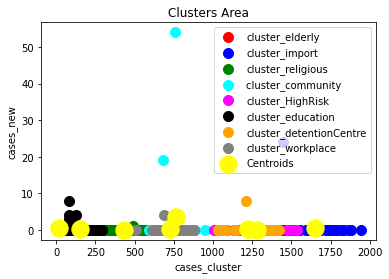

In [178]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster_elderly')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster_import')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster_religious')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster_community ')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster_HighRisk')
plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='black',label='cluster_education')
plt.scatter(X[y_kmeans==6,0],X[y_kmeans==6,1],s=100,c='orange',label='cluster_detentionCentre')
plt.scatter(X[y_kmeans==7,0],X[y_kmeans==7,1],s=100,c='grey',label='cluster_workplace')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')


plt.title('Clusters Area')
plt.xlabel('cases_cluster')
plt.ylabel('cases_new')
plt.legend()
plt.show()

#### Observation: We noticed that the prediction of eventual source of covid19 would be on Cluster_education, Cluster_community, and Cluster_workplace
##### Therefore it will be suitable to recommend or educated the populations to:
    1. Continuing with online class for children
    2. To work from home
    3. To postpone with the future event or avoid to gather in community until the case decrease.